Business & Data Understanding

Genre - the genre of the track <br>
Year - the release year of the recording
Added - the earliest date you added the track to your collection <br>
Beats Per Minute (BPM) - The tempo of the song <br>
Energy - The energy of a song - the higher the value, the more energtic <br>
Danceability - The higher the value, the easier it is to dance to this song <br>
Loudness (dB) - The higher the value, the louder the song <br>
Liveness - The higher the value, the more likely the song is a live recording <br>
Valence - The higher the value, the more positive mood for the song <br>
Length - The duration of the song <br>
Acousticness - The higher the value the more acoustic the song is <br>
Speechiness - The higher the value the more spoken word the song contains <br>
Popularity - The higher the value the more popular the song is <br>
Duration - The length of the song <br>
Mode - Major (1) or Minor  (0)

This is a balanced, multi-class classification algorithm - all genre classifications have equal importance and therefore equal weight.

Try GridSearchCV for hyperparameter tuning since dataset is relatively small

Data Preparation

Modeling

Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, accuracy_score, roc_curve, auc, roc_auc_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE, ADASYN


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('spotify_genre_final.xlsx')

In [3]:
df.head()

,Genre,Title,Album_cover_link,Artist,duration_ms,explicit,id,popularity,release_date,release_date_precision,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,rock,Baba O'Riley,https://i.scdn.co/image/ab67616d0000b273fe24dc...,The Who,300400,False,3qiyyUfYe7CRYLucrPmulD,75,1971-08-14,day,...,5,-8.367,1,0.0352,0.31300,0.185000,0.2870,0.150,117.292,4
1,rock,More Than a Feeling,https://i.scdn.co/image/ab67616d0000b27390ef97...,Boston,285133,False,1QEEqeFIZktqIpPI4jSVSF,78,1976,year,...,7,-8.039,1,0.0298,0.00088,0.002300,0.0504,0.285,108.789,4
2,rock,(Don't Fear) The Reaper,https://i.scdn.co/image/ab67616d0000b2733ac318...,Blue Öyster Cult,308120,False,5QTxFnGygVM4jFQiBovmRo,76,1976,year,...,9,-8.550,0,0.0733,0.00290,0.000208,0.2970,0.385,141.466,4
3,rock,Jump - 2015 Remaster,https://i.scdn.co/image/ab67616d0000b273b414c6...,Van Halen,241599,False,7N3PAbqfTjSEU1edb2tY8j,78,1984-01-04,day,...,0,-6.219,1,0.0317,0.17100,0.000377,0.0702,0.795,129.981,4
4,rock,Stairway to Heaven - Remaster,https://i.scdn.co/image/ab67616d0000b273c8a11e...,Led Zeppelin,482830,False,5CQ30WqJwcep0pYcV4AMNc,79,1971-11-08,day,...,9,-12.049,0,0.0339,0.58000,0.003200,0.1160,0.197,82.433,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6917 entries, 0 to 6916
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genre                   6917 non-null   object 
 1   Title                   6917 non-null   object 
 2   Album_cover_link        6917 non-null   object 
 3   Artist                  6917 non-null   object 
 4   duration_ms             6917 non-null   int64  
 5   explicit                6917 non-null   bool   
 6   id                      6917 non-null   object 
 7   popularity              6917 non-null   int64  
 8   release_date            6917 non-null   object 
 9   release_date_precision  6917 non-null   object 
 10  total_tracks            6917 non-null   int64  
 11  danceability            6917 non-null   float64
 12  energy                  6917 non-null   float64
 13  key                     6917 non-null   int64  
 14  loudness                6917 non-null   

In [5]:
df.describe()

,duration_ms,popularity,total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000,6917.000000
mean,230325.976579,60.491543,11.780541,0.663048,0.680214,5.348851,-6.725942,0.584357,0.111231,0.178805,0.034783,0.184376,0.538109,120.034788,3.972531
std,54336.723207,12.944708,8.268982,0.151653,0.173824,3.617507,2.783829,0.492868,0.096413,0.214174,0.138639,0.147764,0.233274,28.015297,0.247247
min,120133.000000,0.000000,1.000000,0.142000,0.084800,0.000000,-20.567000,0.000000,0.022400,0.000002,0.000000,0.013600,0.026000,52.145000,1.000000
25%,193466.000000,53.000000,8.000000,0.562000,0.562000,2.000000,-8.166000,0.000000,0.040600,0.020400,0.000000,0.091600,0.356000,96.571000,4.000000
50%,223733.000000,62.000000,12.000000,0.679000,0.696000,6.000000,-6.258000,1.000000,0.064500,0.088000,0.000002,0.125000,0.546000,120.010000,4.000000
75%,259853.000000,69.000000,16.000000,0.775000,0.818000,8.000000,-4.787000,1.000000,0.157000,0.261000,0.000470,0.236000,0.728000,136.029000,4.000000
max,591693.000000,100.000000,125.000000,0.983000,0.998000,11.000000,0.878000,1.000000,0.399000,0.983000,0.973000,0.979000,0.985000,214.025000,5.000000


In [6]:
## Class Frequency of Target Variable

df['Genre'].value_counts()

pop       1161
rock      1136
latin     1036
hiphop     971
edm        956
rap        926
r&b        731
Name: Genre, dtype: int64

In [7]:
## Baseline Model - Decision Tree

In [8]:
## TRAIN TEST SPLIT

y = df['Genre']
X = df.drop(columns = ['Genre', 'Artist', 'Title', 'Album_cover_link', 'release_date_precision', 'release_date', 'id'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [9]:
## Pre-Processing (Train)

X_train_categoricals = X_train[['explicit', 'key', 'time_signature', 'mode']]
X_train_categoricals['explicit'] = X_train_categoricals.explicit.astype('category')
X_train_categoricals['key'] = X_train_categoricals.key.astype('category')
X_train_categoricals['time_signature'] = X_train_categoricals.time_signature.astype('category')
X_train_categoricals['mode'] = X_train_categoricals['mode'].astype('category')


X_train_dummies = pd.get_dummies(X_train_categoricals, drop_first = True)
X_train_numeric = X_train.drop(columns = X_train_categoricals.columns)

X_train_OHE = pd.concat([X_train_numeric, X_train_dummies], axis = 1)
X_train_OHE

,duration_ms,popularity,total_tracks,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_3,time_signature_4,time_signature_5,mode_1
2773,194750,45,15,0.446,0.732,-6.428,0.0361,0.00767,0.000000,0.1310,...,0,0,0,0,0,0,0,1,0,0
5172,180596,79,1,0.684,0.506,-6.743,0.0338,0.15900,0.000000,0.2600,...,1,0,0,0,0,0,0,1,0,1
726,221640,70,13,0.699,0.502,-12.526,0.0278,0.06070,0.033700,0.3170,...,0,0,0,1,0,0,0,1,0,1
319,194288,64,19,0.415,0.950,-4.676,0.0621,0.00126,0.000039,0.1330,...,0,0,0,0,0,0,0,1,0,1
5382,173600,75,14,0.797,0.844,-5.482,0.2750,0.06510,0.000000,0.0870,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,262800,62,12,0.737,0.890,-8.443,0.1580,0.00556,0.001710,0.0801,...,0,0,0,0,0,0,0,1,0,1
4060,201122,77,15,0.694,0.712,-3.923,0.0460,0.13200,0.000000,0.2110,...,0,1,0,0,0,0,0,1,0,0
1346,208272,59,21,0.705,0.611,-6.772,0.2360,0.03090,0.000000,0.0903,...,0,0,0,0,0,0,0,1,0,0
3454,176093,11,12,0.809,0.550,-11.264,0.0392,0.69000,0.000007,0.1120,...,0,0,0,1,0,0,0,1,0,1


In [10]:
## Pre-Processing (Test)

X_test_categoricals = X_test[['explicit', 'key', 'time_signature', 'mode']]
X_test_categoricals['explicit'] = X_test_categoricals.explicit.astype('category')
X_test_categoricals['key'] = X_test_categoricals.key.astype('category')
X_test_categoricals['time_signature'] = X_test_categoricals.time_signature.astype('category')
X_test_categoricals['mode'] = X_test_categoricals['mode'].astype('category')


X_test_dummies = pd.get_dummies(X_test_categoricals, drop_first = True)
X_test_numeric = X_test.drop(columns = X_test_categoricals.columns)

X_test_OHE = pd.concat([X_test_numeric, X_test_dummies], axis = 1)
X_test_OHE

,duration_ms,popularity,total_tracks,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_3,time_signature_4,time_signature_5,mode_1
4075,186986,81,18,0.697,0.6830,-2.881,0.1170,0.0372,0.000000,0.1370,...,0,0,0,0,0,0,0,1,0,0
6550,201493,70,14,0.332,0.6350,-5.653,0.0898,0.1590,0.000003,0.0599,...,0,1,0,0,0,0,1,0,0,1
6021,298493,47,19,0.889,0.7130,-4.845,0.2280,0.0181,0.000000,0.0715,...,0,0,0,0,0,0,0,1,0,1
1126,165426,69,13,0.380,0.0993,-20.567,0.0509,0.9140,0.000023,0.0605,...,0,0,0,0,0,0,0,1,0,1
5364,338853,75,16,0.375,0.8620,-3.363,0.2550,0.0710,0.000000,0.2110,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,240341,75,14,0.610,0.4580,-11.336,0.3600,0.6960,0.000103,0.0852,...,0,0,0,1,0,0,0,1,0,1
6028,221626,60,20,0.462,0.9440,-2.938,0.3150,0.3120,0.000149,0.3670,...,0,0,1,0,0,0,0,1,0,1
3087,235133,63,20,0.651,0.9120,-3.402,0.2230,0.0969,0.000040,0.1070,...,0,1,0,0,0,0,0,1,0,1
4488,188386,81,11,0.744,0.6190,-9.805,0.0390,0.5980,0.003720,0.2310,...,0,0,0,0,0,0,0,1,0,1


In [11]:
DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC.fit(X_train_OHE, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

In [12]:
y_pred_train = DTC.predict(X_train_OHE)

balanced_accuracy_score(y_train, y_pred_train)

0.8857016762435178

In [13]:
y_pred_test = DTC.predict(X_test_OHE)

balanced_accuracy_score(y_test, y_pred_test)

0.4033407146280988

In [14]:
y_pred_train_proba = DTC.predict_proba(X_train_OHE)
roc_auc_score(y_train, y_pred_train_proba, multi_class = 'ovr')

0.9933456361031014

In [15]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

         edm       0.92      1.00      0.96       743
      hiphop       0.66      1.00      0.80       792
       latin       0.99      1.00      0.99       839
         pop       0.90      0.92      0.91       937
         r&b       0.99      0.80      0.88       576
         rap       1.00      0.49      0.66       748
        rock       1.00      0.99      1.00       898

    accuracy                           0.90      5533
   macro avg       0.92      0.89      0.89      5533
weighted avg       0.92      0.90      0.89      5533



In [16]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         edm       0.63      0.55      0.59       213
      hiphop       0.25      0.35      0.29       179
       latin       0.48      0.46      0.47       197
         pop       0.35      0.42      0.38       224
         r&b       0.29      0.27      0.28       155
         rap       0.21      0.16      0.18       178
        rock       0.68      0.62      0.65       238

    accuracy                           0.42      1384
   macro avg       0.41      0.40      0.41      1384
weighted avg       0.43      0.42      0.42      1384



It looks like the baseline model is performing well on the training data, but not very well on the testing data - which suggests overfitting. Additionally, the model is worst at predicting rap and hip hop, which makes sense because those two genres are very similar. I will consolidate these two genres into one (hiphop_rap) and create a new model to compare performance.

In [17]:
y_train_2 = y_train.replace(['hiphop', 'rap'],'hiphop_rap')

In [18]:
y_test_2 = y_test.replace(['hiphop', 'rap'],'hiphop_rap')
y_test_2.value_counts()

hiphop_rap    357
rock          238
pop           224
edm           213
latin         197
r&b           155
Name: Genre, dtype: int64

There seems to be some class imbalance here - i.e. there are more than twice as many hip hop songs than r&b songs. We can use SMOTE resampling to adjust for this imbalance.

In [124]:
print(y_train_2.value_counts())

X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_OHE, y_train_2)

print(pd.Series(y_train_resampled).value_counts()) 

hiphop_rap    1540
pop            937
rock           898
latin          839
edm            743
r&b            576
Name: Genre, dtype: int64
latin         1540
pop           1540
rock          1540
r&b           1540
hiphop_rap    1540
edm           1540
Name: Genre, dtype: int64


In [126]:
X_test_resampled, y_test_resampled = SMOTE().fit_resample(X_test_OHE, y_test_2)

In [127]:
DTC2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)
DTC2.fit(X_train_resampled, y_train_resampled)

y_pred_train_2 = DTC2.predict(X_train_resampled)
y_pred_test_2 = DTC2.predict(X_test_resampled)

In [129]:
print(classification_report(y_train_resampled, y_pred_train_2))

              precision    recall  f1-score   support

         edm       0.96      1.00      0.98      1540
  hiphop_rap       0.96      1.00      0.98      1540
       latin       0.99      1.00      1.00      1540
         pop       0.95      0.94      0.94      1540
         r&b       1.00      0.92      0.96      1540
        rock       1.00      1.00      1.00      1540

    accuracy                           0.98      9240
   macro avg       0.98      0.98      0.98      9240
weighted avg       0.98      0.98      0.98      9240



In [130]:
print(classification_report(y_test_resampled, y_pred_test_2))

              precision    recall  f1-score   support

         edm       0.68      0.67      0.67       357
  hiphop_rap       0.69      0.81      0.75       357
       latin       0.51      0.49      0.50       357
         pop       0.37      0.39      0.38       357
         r&b       0.43      0.35      0.39       357
        rock       0.64      0.66      0.65       357

    accuracy                           0.56      2142
   macro avg       0.56      0.56      0.56      2142
weighted avg       0.56      0.56      0.56      2142



Consolidating HipHop and Rap into one class seems to have improved model performance across the board on both training and test sets

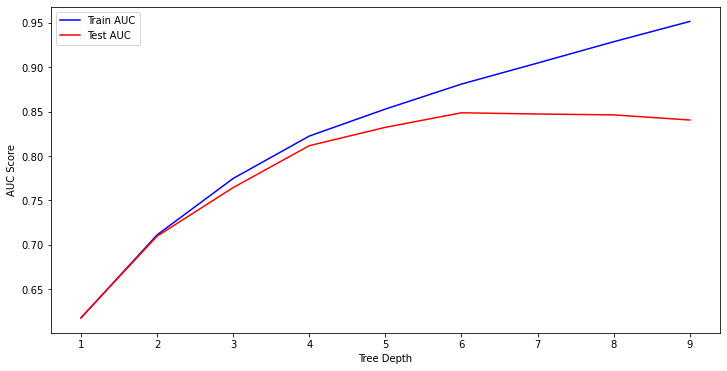

In [132]:
## Tune hyperparameters to adjust for overfitting

max_depth = np.array(range(1,10))

train_results = []
test_results = []

for value in max_depth:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = value, random_state = 1)
    DTC.fit(X_train_resampled, y_train_resampled)
    y_pred_train_proba = DTC.predict_proba(X_train_resampled)
    roc_auc = roc_auc_score(y_train_resampled, y_pred_train_proba, multi_class = 'ovr')
    train_results.append(roc_auc)
    
    y_pred_test_proba = DTC.predict_proba(X_test_resampled)
    roc_auc = roc_auc_score(y_test_resampled, y_pred_test_proba, multi_class = 'ovr')
    test_results.append(roc_auc)

plt.figure(figsize=(12,6))
plt.plot(max_depth, train_results, 'b', label='Train AUC')
plt.plot(max_depth, test_results, 'r', label='Test AUC')
plt.ylabel('AUC Score')
plt.xlabel('Tree Depth')
plt.legend()
plt.show()

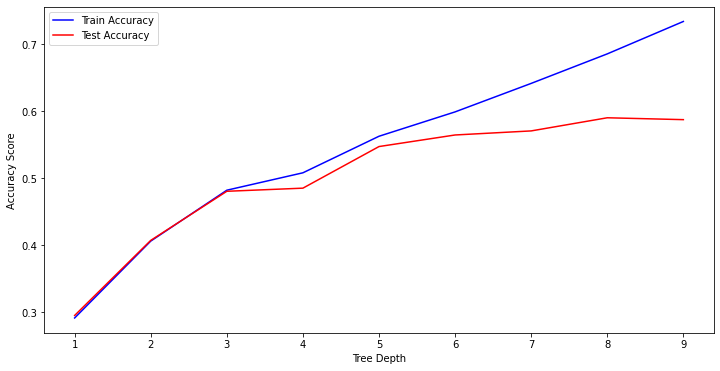

In [133]:
max_depth = np.array(range(1,10))

train_results = []
test_results = []

for value in max_depth:
    DTC = DecisionTreeClassifier(criterion = 'entropy', max_depth = value, random_state = 1)
    DTC.fit(X_train_resampled, y_train_resampled)
    y_pred_train = DTC.predict(X_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
    train_results.append(train_accuracy)
    
    y_pred_test = DTC.predict(X_test_resampled)
    test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
    test_results.append(test_accuracy)

plt.figure(figsize=(12,6))
plt.plot(max_depth, train_results, 'b', label='Train Accuracy')
plt.plot(max_depth, test_results, 'r', label='Test Accuracy')
plt.ylabel('Accuracy Score')
plt.xlabel('Tree Depth')
plt.legend()
plt.show()

In [134]:
DTC3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 1, max_depth = 8)
DTC3.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=1)

In [135]:
y_pred_train_3 = DTC3.predict(X_train_resampled)

print(classification_report(y_train_resampled, y_pred_train_3))

              precision    recall  f1-score   support

         edm       0.84      0.81      0.82      1540
  hiphop_rap       0.80      0.84      0.82      1540
       latin       0.60      0.56      0.58      1540
         pop       0.52      0.59      0.55      1540
         r&b       0.61      0.58      0.59      1540
        rock       0.76      0.75      0.75      1540

    accuracy                           0.69      9240
   macro avg       0.69      0.69      0.69      9240
weighted avg       0.69      0.69      0.69      9240



In [136]:
y_pred_test_3 = DTC3.predict(X_test_resampled)

print(classification_report(y_test_resampled, y_pred_test_3))

              precision    recall  f1-score   support

         edm       0.74      0.66      0.70       357
  hiphop_rap       0.70      0.80      0.75       357
       latin       0.54      0.49      0.52       357
         pop       0.39      0.49      0.43       357
         r&b       0.50      0.45      0.48       357
        rock       0.72      0.65      0.68       357

    accuracy                           0.59      2142
   macro avg       0.60      0.59      0.59      2142
weighted avg       0.60      0.59      0.59      2142



In [137]:
clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 15, 16],
    'min_samples_split': [44, 45, 46],
    'min_samples_leaf': [15, 16, 17, 18],
    'max_features': [20, 25]

}

gs_tree = GridSearchCV(clf, param_grid, cv=3)
gs_tree.fit(X_train_resampled, y_train_resampled)

gs_tree.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 25,
 'min_samples_leaf': 15,
 'min_samples_split': 44}

In [138]:
DTC_best = DecisionTreeClassifier(criterion = 'gini', 
                                  max_depth = 14, 
                                  min_samples_split = 44, 
                                  min_samples_leaf = 15, 
                                  max_features = 25,
                                  random_state = 1)
DTC_best.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=14, max_features=25, min_samples_leaf=15,
                       min_samples_split=44, random_state=1)

In [139]:
y_pred_train_best = DTC_best.predict(X_train_resampled)

print(classification_report(y_train_resampled, y_pred_train_best))

              precision    recall  f1-score   support

         edm       0.83      0.81      0.82      1540
  hiphop_rap       0.76      0.83      0.79      1540
       latin       0.66      0.69      0.68      1540
         pop       0.59      0.61      0.60      1540
         r&b       0.67      0.62      0.64      1540
        rock       0.81      0.75      0.78      1540

    accuracy                           0.72      9240
   macro avg       0.72      0.72      0.72      9240
weighted avg       0.72      0.72      0.72      9240



In [140]:
y_pred_test_best = DTC_best.predict(X_test_resampled)

print(classification_report(y_test_resampled, y_pred_test_best))

              precision    recall  f1-score   support

         edm       0.78      0.70      0.74       357
  hiphop_rap       0.67      0.80      0.73       357
       latin       0.50      0.53      0.51       357
         pop       0.46      0.48      0.47       357
         r&b       0.47      0.43      0.45       357
        rock       0.71      0.66      0.68       357

    accuracy                           0.60      2142
   macro avg       0.60      0.60      0.60      2142
weighted avg       0.60      0.60      0.60      2142



# RANDOM FOREST MODEL V2

In [141]:
## Model V2 - Random Forest

forest = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 1)
forest.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=12, random_state=1)

In [142]:
forest.score(X_train_resampled, y_train_resampled)

0.9383116883116883

In [143]:
forest.score(X_test_resampled, y_test_resampled)

0.6918767507002801

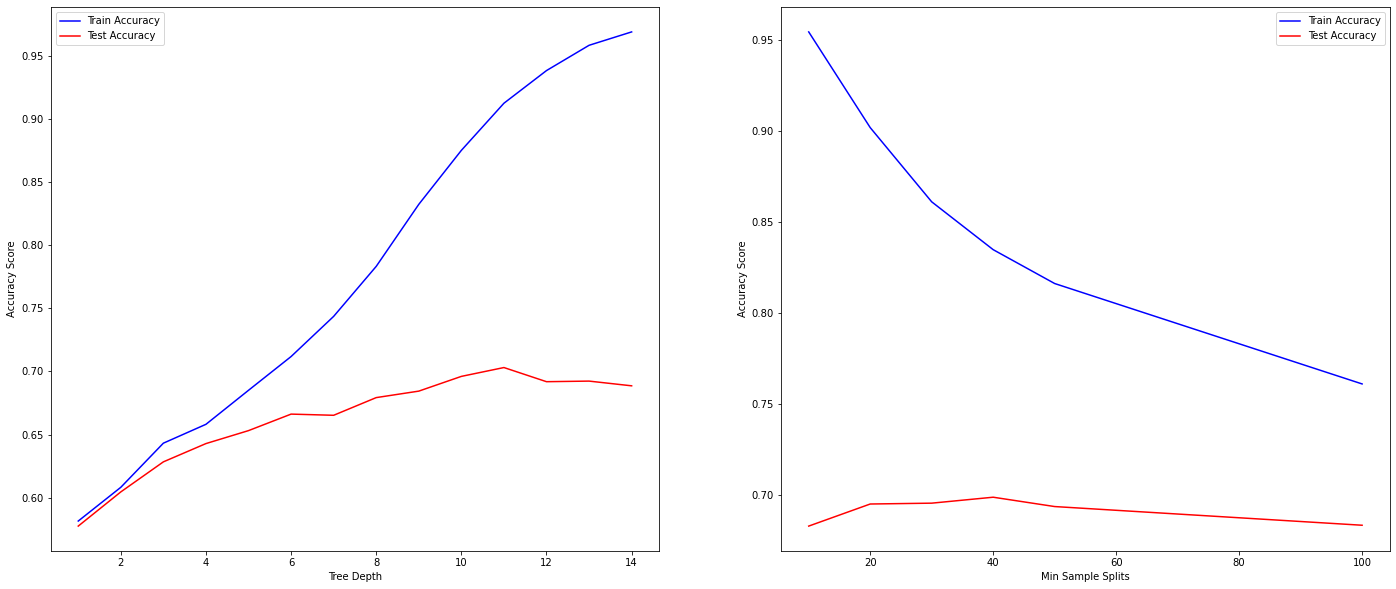

In [144]:
# Testing different Max Depth values against model accuracy

max_depth = np.array(range(1,15))

train_results_max_depth = []
test_results_max_depth = []

for value in max_depth:
    RFC = RandomForestClassifier(n_estimators = 100, max_depth = value, random_state = 1)
    RFC.fit(X_train_resampled, y_train_resampled)
    y_pred_train = RFC.predict(X_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
    train_results_max_depth.append(train_accuracy)
    
    y_pred_test = RFC.predict(X_test_resampled)
    test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
    test_results_max_depth.append(test_accuracy)
    
# Testing different Min Sample Split values against model accuracy
    
min_samples_splits = [10, 20, 30, 40, 50, 100]
min_samples_splits

train_results_sample_splits = []
test_results_sample_splits = []
    
for min_samples_split in min_samples_splits:
    RFC = RandomForestClassifier(n_estimators = 100, min_samples_split = min_samples_split, random_state = 1)
    RFC.fit(X_train_resampled, y_train_resampled)
    y_pred_train = RFC.predict(X_train_resampled)
    train_accuracy = accuracy_score(y_train_resampled, y_pred_train)
    train_results_sample_splits.append(train_accuracy)
    
    y_pred_test = RFC.predict(X_test_resampled)
    test_accuracy = accuracy_score(y_test_resampled, y_pred_test)
    test_results_sample_splits.append(test_accuracy)
    
# Plotting results
   
fig , (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (24,10))

ax1.plot(max_depth, train_results_max_depth, 'b', label='Train Accuracy')
ax1.plot(max_depth, test_results_max_depth, 'r', label='Test Accuracy')
ax1.set_ylabel('Accuracy Score')
ax1.set_xlabel('Tree Depth')
ax1.legend()

ax2.plot(min_samples_splits, train_results_sample_splits, 'b', label='Train Accuracy')
ax2.plot(min_samples_splits, test_results_sample_splits, 'r', label='Test Accuracy')
ax2.set_ylabel('Accuracy Score')
ax2.set_xlabel('Min Sample Splits')
ax2.legend();

The above shows a Tree Depth of around 8-12 being optimal, and a Min Samples Split of around 20-40 being optimal.

In [146]:
forest_clf = RandomForestClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [100],
    'max_depth': [8, 10, 12],
    'min_samples_split': [20, 25, 30, 40],

}

gs_forest = GridSearchCV(forest_clf, param_grid, cv=3)
gs_forest.fit(X_train_resampled, y_train_resampled)

gs_forest.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_split': 20,
 'n_estimators': 100}

In [171]:
forest2 = RandomForestClassifier(criterion = 'gini', max_depth = 12, n_estimators = 100, min_samples_split = 20, random_state = 1)
forest2.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=12, min_samples_split=20, random_state=1)

In [172]:
forest2.score(X_train_resampled, y_train_resampled)

0.8658008658008658

In [173]:
forest2.score(X_test_resampled, y_test_resampled)

0.6956115779645191

# BINARY CLASSIFICATION TESTING

In [46]:
## What if we treat this like a binary classification problem? hip hop or not hiphop

y_train_binary = y_train_3.replace(['pop_r&b','rock','edm','latin'],'not_hiphop')
y_test_binary = y_test_3.replace(['pop_r&b','rock','edm','latin'],'not_hiphop')

In [47]:
y_train_binary.value_counts()

not_hiphop    3993
hiphop_rap    1540
Name: Genre, dtype: int64

In [48]:
## Disproportionate target variable class counts - how to address? SMOTE?

In [49]:
clf_binary = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 15, 16],
    'min_samples_split': [44, 45, 46],
    'min_samples_leaf': [15, 16, 17, 18],
    'max_features': [20, 25]

}

gs_tree = GridSearchCV(clf_binary, param_grid, cv=3)
gs_tree.fit(X_train_OHE, y_train_binary)

gs_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 20,
 'min_samples_leaf': 18,
 'min_samples_split': 45}

In [50]:
DTC_best_binary = DecisionTreeClassifier(criterion = 'gini', 
                                  max_depth = 15, 
                                  min_samples_split = 45, 
                                  min_samples_leaf = 18, 
                                  max_features = 25,
                                  random_state = 1)

DTC_best_binary.fit(X_train_OHE, y_train_binary)

DecisionTreeClassifier(max_depth=15, max_features=25, min_samples_leaf=18,
                       min_samples_split=45, random_state=1)

In [51]:
y_pred_train_best_binary = DTC_best_binary.predict(X_train_OHE)

print(classification_report(y_train_binary, y_pred_train_best_binary))

              precision    recall  f1-score   support

  hiphop_rap       0.83      0.86      0.85      1540
  not_hiphop       0.95      0.93      0.94      3993

    accuracy                           0.91      5533
   macro avg       0.89      0.90      0.89      5533
weighted avg       0.91      0.91      0.91      5533



In [52]:
y_pred_test_best_binary = DTC_best_binary.predict(X_test_OHE)

print(classification_report(y_test_binary, y_pred_test_best_binary))

              precision    recall  f1-score   support

  hiphop_rap       0.74      0.83      0.78       357
  not_hiphop       0.94      0.90      0.92      1027

    accuracy                           0.88      1384
   macro avg       0.84      0.86      0.85      1384
weighted avg       0.89      0.88      0.88      1384



In [53]:
## Do the lower scores for hip hop have to do with the unbalanced class distribution? - try SMOTE and see what happens

print(y_train_binary.value_counts())

X_train_binary_resampled, y_train_binary_resampled = SMOTE().fit_resample(X_train_OHE, y_train_binary)


print(pd.Series(y_train_binary_resampled).value_counts()) 

not_hiphop    3993
hiphop_rap    1540
Name: Genre, dtype: int64
not_hiphop    3993
hiphop_rap    3993
Name: Genre, dtype: int64


In [54]:
X_test_binary_resampled, y_test_binary_resampled = SMOTE().fit_resample(X_test_OHE, y_test_binary)

In [55]:
DTC_best_binary_resampled = DecisionTreeClassifier(criterion = 'gini', 
                                  max_depth = 15, 
                                  min_samples_split = 45, 
                                  min_samples_leaf = 18, 
                                  max_features = 25,
                                  random_state = 1)

DTC_best_binary_resampled.fit(X_train_binary_resampled, y_train_binary_resampled)

DecisionTreeClassifier(max_depth=15, max_features=25, min_samples_leaf=18,
                       min_samples_split=45, random_state=1)

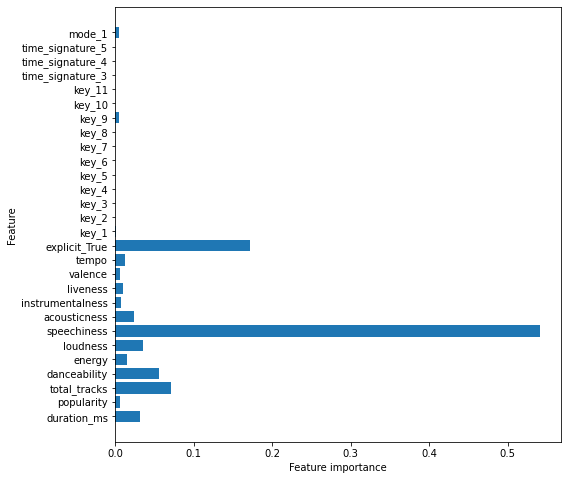

In [58]:
DTC_best_binary_resampled.feature_importances_

def plot_feature_importances(model):
    n_features = X_train_OHE.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train_OHE.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(DTC_best_binary_resampled)

The above makes sense intuitvely because hiphop / rap as a genre is very-much-so about the lyrics. Rap songs also tend to be explicit and so seeing that as the second most important feature makes sense.

In [59]:
y_pred_train_best_binary_resampled = DTC_best_binary_resampled.predict(X_train_binary_resampled)

print(classification_report(y_train_binary_resampled, y_pred_train_best_binary_resampled))

              precision    recall  f1-score   support

  hiphop_rap       0.90      0.92      0.91      3993
  not_hiphop       0.92      0.89      0.91      3993

    accuracy                           0.91      7986
   macro avg       0.91      0.91      0.91      7986
weighted avg       0.91      0.91      0.91      7986



In [60]:
y_pred_test_best_binary_resampled = DTC_best_binary_resampled.predict(X_test_binary_resampled)

print(classification_report(y_test_binary_resampled, y_pred_test_best_binary_resampled))

              precision    recall  f1-score   support

  hiphop_rap       0.87      0.90      0.88      1027
  not_hiphop       0.90      0.87      0.88      1027

    accuracy                           0.88      2054
   macro avg       0.88      0.88      0.88      2054
weighted avg       0.88      0.88      0.88      2054



It appears that leveling the distribution of classes using SMOTE improved scores across the board

In [61]:
y_train_binary_edm = y_train_2.replace(['hiphop_rap','pop','rock','latin','r&b'],'not_edm')
y_test_binary_edm = y_test_2.replace(['hiphop_rap','pop','rock','latin','r&b'],'not_edm')

y_test_binary_edm.value_counts()

not_edm    1171
edm         213
Name: Genre, dtype: int64

In [64]:
print(y_train_binary_edm.value_counts())

X_train_binary_edm_resampled, y_train_binary_edm_resampled = SMOTE().fit_resample(X_train_OHE, y_train_binary_edm)


print(pd.Series(y_train_binary_edm_resampled).value_counts()) 

not_edm    4790
edm         743
Name: Genre, dtype: int64
not_edm    4790
edm        4790
Name: Genre, dtype: int64


In [65]:
X_test_binary_edm_resampled, y_test_binary_edm_resampled = SMOTE().fit_resample(X_test_OHE, y_test_binary_edm)

In [67]:
## Testing the same binary classification for edm

clf_binary_edm = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 15, 16],
    'min_samples_split': [44, 45, 46],
    'min_samples_leaf': [15, 16, 17, 18],
    'max_features': [20, 25]

}

gs_tree = GridSearchCV(clf_binary_edm, param_grid, cv=3)
gs_tree.fit(X_train_binary_edm_resampled, y_train_binary_edm_resampled)

gs_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 20,
 'min_samples_leaf': 18,
 'min_samples_split': 45}

In [94]:
DTC_best_binary_edm_resampled = DecisionTreeClassifier(criterion = 'entropy', 
                                  max_depth = 15, 
                                  min_samples_split = 45, 
                                  min_samples_leaf = 18, 
                                  max_features = 20,
                                  random_state = 1)

DTC_best_binary_edm_resampled.fit(X_train_OHE, y_train_binary_edm)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features=20,
                       min_samples_leaf=18, min_samples_split=45,
                       random_state=1)

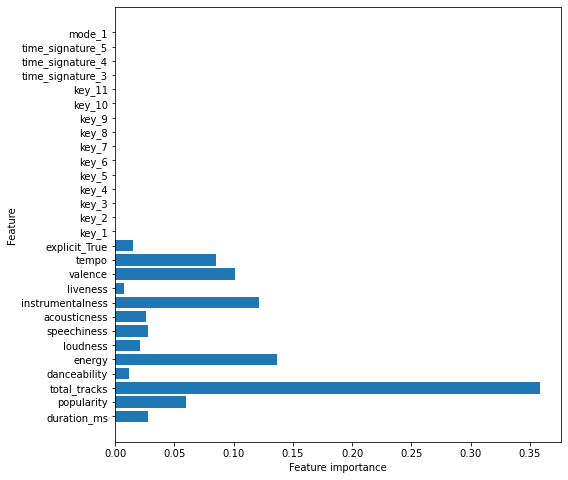

In [95]:
plot_feature_importances(DTC_best_binary_edm_resampled)

It looks like for EDM, the most important features were total_tracks, instrumentalness, energy, valence, and tempo. This all makes sense given the characteristics of electronic dance music.

In [96]:
y_pred_train_best_binary_edm_resampled = DTC_best_binary_edm_resampled.predict(X_train_binary_edm_resampled)

print(classification_report(y_train_binary_edm_resampled, y_pred_train_best_binary_edm_resampled))


              precision    recall  f1-score   support

         edm       0.97      0.71      0.82      4790
     not_edm       0.77      0.98      0.86      4790

    accuracy                           0.84      9580
   macro avg       0.87      0.84      0.84      9580
weighted avg       0.87      0.84      0.84      9580



In [97]:
y_pred_test_best_binary_edm_resampled = DTC_best_binary_edm_resampled.predict(X_test_binary_edm_resampled)

print(classification_report(y_test_binary_edm_resampled, y_pred_test_best_binary_edm_resampled))

              precision    recall  f1-score   support

         edm       0.95      0.63      0.76      1171
     not_edm       0.72      0.97      0.83      1171

    accuracy                           0.80      2342
   macro avg       0.84      0.80      0.79      2342
weighted avg       0.84      0.80      0.79      2342

